# **Imports**

In [71]:
# This code was done by 223077593 - ORILIO NAOBEB
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from thefuzz import process

import matplotlib.pyplot as plt
import seaborn as sns

# This code was done by 222129816 - TANAKA MUSHUKUTU
import plotly.express as px

# **Data Understanding:**

## **Gathering Data/Load dataset**

In [74]:
# This code was done by 223077593 - ORILIO NAOBEB
breast_cancer= pd.read_csv(r"C:\Users\orili\OneDrive\Documents\School stuff\DTA\DTA621-Project\breast+cancer\breast-cancer.csv")

In [75]:
# This code was done by 223077593 - ORILIO NAOBEB
breast_cancer

,Age Range,Menopause,Tumor size,Inv-nodes,Node-caps,Degree of malignancy,Breast,Breast-Quad,Irradiat,Class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,30-39,premeno,30-34,0-2,no,2,left,left_up,no,recurrence-events
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,recurrence-events
283,60-69,ge40,20-24,0-2,no,1,right,left_up,no,recurrence-events
284,40-49,ge40,30-34,5-Mar,no,3,left,left_low,no,recurrence-events


## **Describing data**

In [76]:
# This code was done by 223077593 - ORILIO NAOBEB
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age Range             286 non-null    object
 1   Menopause             286 non-null    object
 2   Tumor size            286 non-null    object
 3   Inv-nodes             286 non-null    object
 4   Node-caps             278 non-null    object
 5   Degree of malignancy  286 non-null    int64 
 6   Breast                286 non-null    object
 7   Breast-Quad           285 non-null    object
 8   Irradiat              286 non-null    object
 9   Class                 286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [77]:
# This code was done by 223077593 - ORILIO NAOBEB
breast_cancer.describe()

,Degree of malignancy
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


## **Exploring data and Verifying data quality**

<Axes: ylabel='Menopause'>

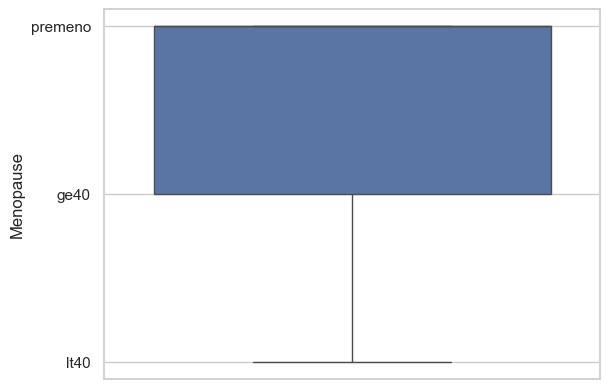

In [78]:
# This code was done by 223077593 - ORILIO NAOBEB
sns.boxplot(breast_cancer['Menopause'])

<Axes: ylabel='Tumor size'>

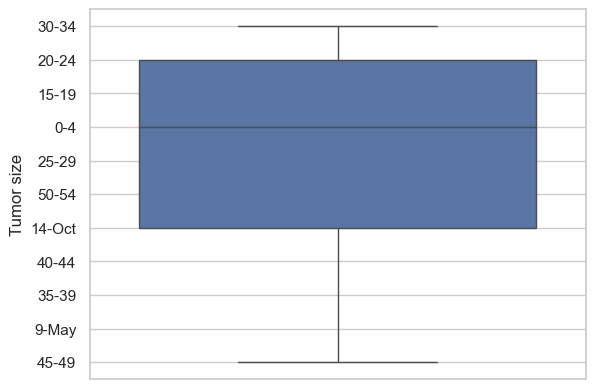

In [79]:
# This code was done by 223077593 - ORILIO NAOBEB
sns.boxplot(breast_cancer['Tumor size'])

<Axes: ylabel='Age Range'>

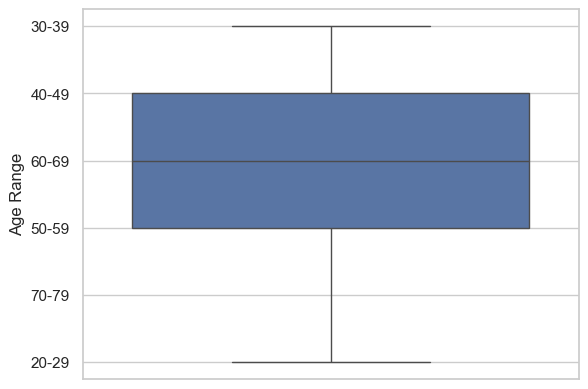

In [80]:
# This code was done by 223077593 - ORILIO NAOBEB
sns.boxplot(breast_cancer['Age Range'])

<Axes: ylabel='Inv-nodes'>

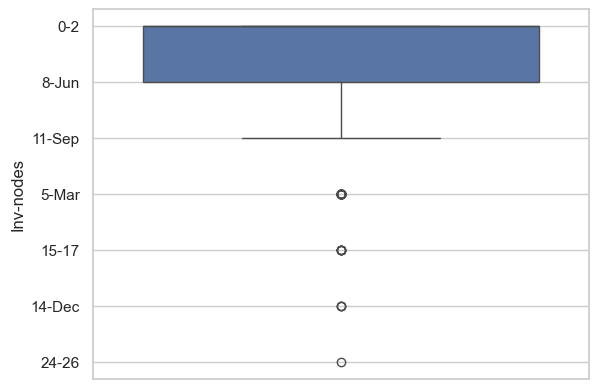

In [81]:
# This code was done by 223077593 - ORILIO NAOBEB
sns.boxplot(breast_cancer['Inv-nodes'])

<Axes: ylabel='Node-caps'>

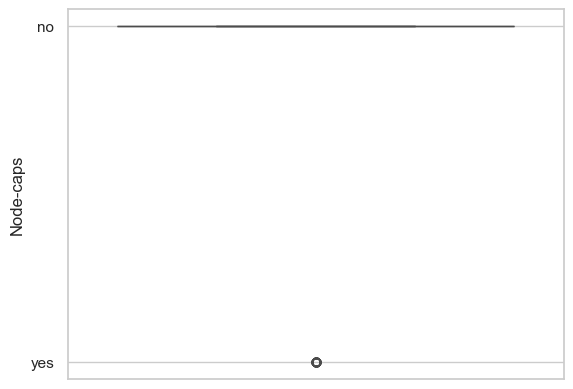

In [82]:
# This code was done by 223077593 - ORILIO NAOBEB
sns.boxplot(breast_cancer['Node-caps'])

<Axes: ylabel='Degree of malignancy'>

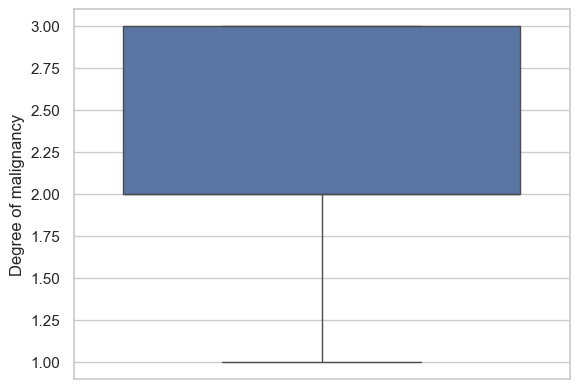

In [83]:
# This code was done by 223077593 - ORILIO NAOBEB
sns.boxplot(breast_cancer['Degree of malignancy'])

<Axes: ylabel='Breast'>

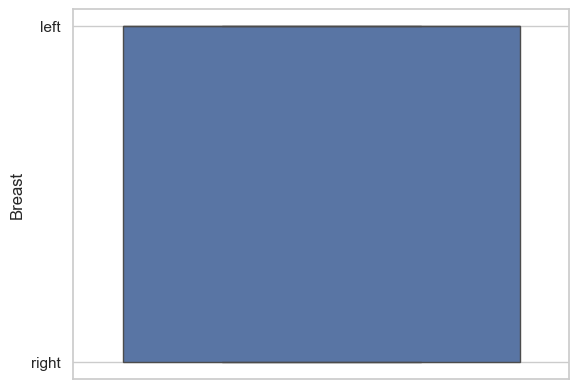

In [84]:
# This code was done by 223077593 - ORILIO NAOBEB
sns.boxplot(breast_cancer['Breast'])

<Axes: ylabel='Breast-Quad'>

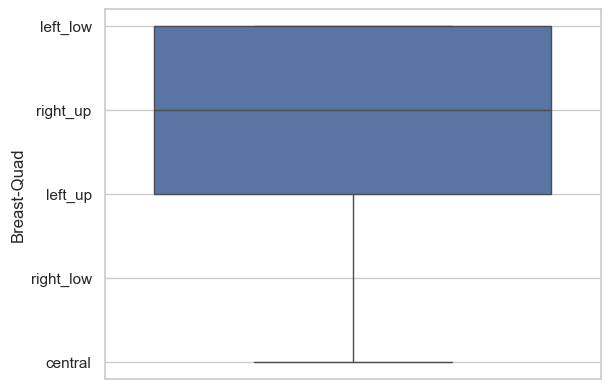

In [85]:
# This code was done by 223077593 - ORILIO NAOBEB
sns.boxplot(breast_cancer['Breast-Quad'])

<Axes: ylabel='Irradiat'>

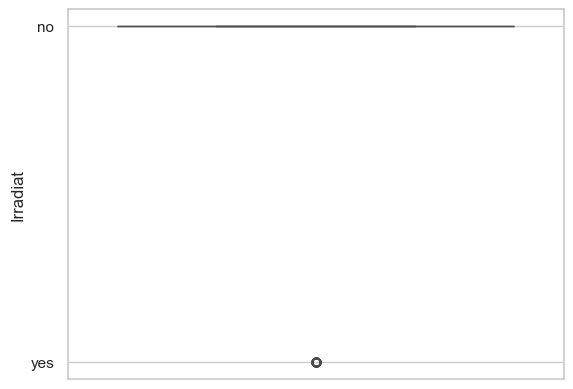

In [86]:
# This code was done by 223077593 - ORILIO NAOBEB
sns.boxplot(breast_cancer['Irradiat'])

<Axes: ylabel='Class'>

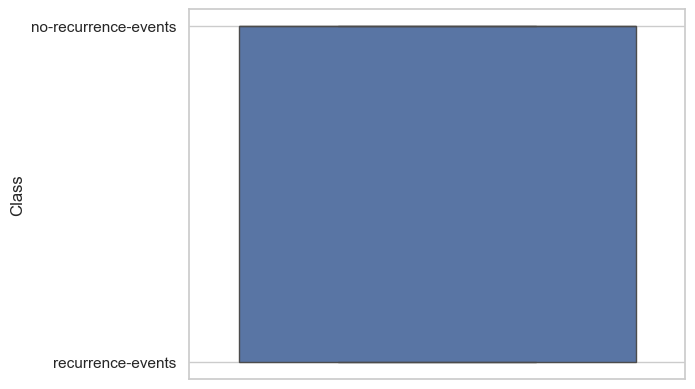

In [87]:
# This code was done by 223077593 - ORILIO NAOBEB
sns.boxplot(breast_cancer['Class'])

In [88]:
# This code was done by 223077593 - ORILIO NAOBEB
print(breast_cancer['Menopause'].unique())

['premeno' 'ge40' 'lt40']


In [89]:
# This code was done by 223077593 - ORILIO NAOBEB
print(breast_cancer['Node-caps'].unique())

['no' 'yes' nan]


In [90]:
# This code was done by 223077593 - ORILIO NAOBEB
print(breast_cancer['Breast'].unique())

['left' 'right']


In [91]:
# This code was done by 223077593 - ORILIO NAOBEB
print(breast_cancer['Breast-Quad'].unique())

['left_low' 'right_up' 'left_up' 'right_low' 'central' nan]


In [96]:
# This code was done by 223077593 - ORILIO NAOBEB
print(breast_cancer['Irradiat'].unique())

['no' 'yes']


In [97]:
# This code was done by 223077593 - ORILIO NAOBEB
print(breast_cancer['Inv-nodes'].unique())

['0-2' '8-Jun' '11-Sep' '5-Mar' '15-17' '14-Dec' '24-26']


In [98]:
# This code was done by 223077593 - ORILIO NAOBEB
print(breast_cancer['Tumor size'].unique())

['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '14-Oct' '40-44' '35-39'
 '9-May' '45-49']


In [99]:
# This code was done by 223077593 - ORILIO NAOBEB
print(breast_cancer['Age Range'].unique())

['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']


In [100]:
# This code was done by 223077593 - ORILIO NAOBEB
print(breast_cancer['Degree of malignancy'].unique())

[3 2 1]


In [101]:
# This code was done by 223077593 - ORILIO NAOBEB
print(breast_cancer['Class'].unique())

['no-recurrence-events' 'recurrence-events']


In [102]:
# This code was done by 223077593 - ORILIO NAOBEB
breast_cancer.isnull().sum()

Age Range               0
Menopause               0
Tumor size              0
Inv-nodes               0
Node-caps               8
Degree of malignancy    0
Breast                  0
Breast-Quad             1
Irradiat                0
Class                   0
dtype: int64

In [103]:
# This code was done by 223077593 - ORILIO NAOBEB
breast_cancer.duplicated().sum()

14

# **Data Cleaning:**

## **Missing Values**

In [104]:
# This code was done by 223077593 - ORILIO NAOBEB
breast_cancer.tail(60)

,Age Range,Menopause,Tumor size,Inv-nodes,Node-caps,Degree of malignancy,Breast,Breast-Quad,Irradiat,Class
226,40-49,premeno,30-34,15-17,yes,3,left,left_low,no,recurrence-events
227,50-59,premeno,30-34,0-2,no,3,right,left_up,yes,recurrence-events
228,60-69,ge40,40-44,5-Mar,yes,3,right,left_low,no,recurrence-events
229,60-69,ge40,45-49,0-2,no,1,right,right_up,yes,recurrence-events
230,50-59,premeno,50-54,11-Sep,yes,2,right,left_up,no,recurrence-events
231,40-49,premeno,30-34,5-Mar,no,2,right,left_up,no,recurrence-events
232,30-39,premeno,30-34,5-Mar,no,3,right,left_up,yes,recurrence-events
233,70-79,ge40,15-19,11-Sep,NaN,1,left,left_low,yes,recurrence-events
234,60-69,ge40,30-34,0-2,no,3,right,left_up,yes,recurrence-events
235,50-59,premeno,25-29,5-Mar,yes,3,left,left_low,yes,recurrence-events


In [105]:
# This code was done by 223077593 - ORILIO NAOBEB
#Handle missing values for 'Node-caps'
node_caps_complete = breast_cancer[breast_cancer['Node-caps'].notna()]
node_caps_missing = breast_cancer[breast_cancer['Node-caps'].isna()]

if not node_caps_missing.empty:
    # Prepare training data
    X_train_node_caps = node_caps_complete.drop(['Node-caps', 'Breast-Quad'], axis=1)
    y_train_node_caps = node_caps_complete['Node-caps']

    # Encode target variable
    label_encoder_node_caps = LabelEncoder()
    y_train_node_caps = label_encoder_node_caps.fit_transform(y_train_node_caps)

    # One-Hot Encoding for categorical features
    X_train_node_caps = pd.get_dummies(X_train_node_caps)

    # Decision Tree for 'Node-caps' (using classifier)
    tree_clf_node_caps = DecisionTreeClassifier()
    tree_clf_node_caps.fit(X_train_node_caps, y_train_node_caps)

    # Prepare features DataFrame for missing 'Node-caps'
    X_missing_node_caps = node_caps_missing.drop(['Node-caps', 'Breast-Quad'], axis=1)

    # One-Hot Encoding for missing features
    X_missing_node_caps = pd.get_dummies(X_missing_node_caps)

    # Ensure the columns match between training and missing data
    X_missing_node_caps = X_missing_node_caps.reindex(columns=X_train_node_caps.columns, fill_value=0)

    # Predict missing 'Node-caps' values
    if not X_missing_node_caps.empty:
        predicted_values_node_caps = tree_clf_node_caps.predict(X_missing_node_caps)
        # Decode predicted values back to original categories
        predicted_values_node_caps = label_encoder_node_caps.inverse_transform(predicted_values_node_caps)
        # Update the missing 'Node-caps' values in the original DataFrame
        breast_cancer.loc[breast_cancer['Node-caps'].isna(), 'Node-caps'] = predicted_values_node_caps

# Step 2: Handle 'Breast-Quad' in a similar way
breast_quad_complete = breast_cancer[breast_cancer['Breast-Quad'].notna()]
breast_quad_missing = breast_cancer[breast_cancer['Breast-Quad'].isna()]

if not breast_quad_missing.empty:
    X_train_breast_quad = breast_quad_complete.drop(['Breast-Quad', 'Node-caps'], axis=1)
    y_train_breast_quad = breast_quad_complete['Breast-Quad']

    # Encode target variable
    label_encoder_breast_quad = LabelEncoder()
    y_train_breast_quad = label_encoder_breast_quad.fit_transform(y_train_breast_quad)

    # One-Hot Encoding for categorical features
    X_train_breast_quad = pd.get_dummies(X_train_breast_quad)

    # Decision Tree for 'Breast-Quad' (using classifier)
    tree_clf_breast_quad = DecisionTreeClassifier()
    tree_clf_breast_quad.fit(X_train_breast_quad, y_train_breast_quad)

    # Prepare features DataFrame for missing 'Breast-Quad'
    X_missing_breast_quad = breast_quad_missing.drop(['Breast-Quad', 'Node-caps'], axis=1)

    # One-Hot Encoding for missing features
    X_missing_breast_quad = pd.get_dummies(X_missing_breast_quad)

    # Ensure the columns match between training and missing data
    X_missing_breast_quad = X_missing_breast_quad.reindex(columns=X_train_breast_quad.columns, fill_value=0)

    # Predict missing 'Breast-Quad' values
    if not X_missing_breast_quad.empty:
        predicted_values_breast_quad = tree_clf_breast_quad.predict(X_missing_breast_quad)
        # Decode predicted values back to original categories
        predicted_values_breast_quad = label_encoder_breast_quad.inverse_transform(predicted_values_breast_quad)
        # Update the missing 'Breast-Quad' values in the original DataFrame
        breast_cancer.loc[breast_cancer['Breast-Quad'].isna(), 'Breast-Quad'] = predicted_values_breast_quad

In [106]:
# This code was done by 223077593 - ORILIO NAOBEB
breast_cancer.isnull().sum()

Age Range               0
Menopause               0
Tumor size              0
Inv-nodes               0
Node-caps               0
Degree of malignancy    0
Breast                  0
Breast-Quad             0
Irradiat                0
Class                   0
dtype: int64

In [107]:
# This code was done by 223077593 - ORILIO NAOBEB
breast_cancer.tail(60)

,Age Range,Menopause,Tumor size,Inv-nodes,Node-caps,Degree of malignancy,Breast,Breast-Quad,Irradiat,Class
226,40-49,premeno,30-34,15-17,yes,3,left,left_low,no,recurrence-events
227,50-59,premeno,30-34,0-2,no,3,right,left_up,yes,recurrence-events
228,60-69,ge40,40-44,5-Mar,yes,3,right,left_low,no,recurrence-events
229,60-69,ge40,45-49,0-2,no,1,right,right_up,yes,recurrence-events
230,50-59,premeno,50-54,11-Sep,yes,2,right,left_up,no,recurrence-events
231,40-49,premeno,30-34,5-Mar,no,2,right,left_up,no,recurrence-events
232,30-39,premeno,30-34,5-Mar,no,3,right,left_up,yes,recurrence-events
233,70-79,ge40,15-19,11-Sep,yes,1,left,left_low,yes,recurrence-events
234,60-69,ge40,30-34,0-2,no,3,right,left_up,yes,recurrence-events
235,50-59,premeno,25-29,5-Mar,yes,3,left,left_low,yes,recurrence-events


## **Data Redundancy**

In [108]:
# This code was done by 223077593 - ORILIO NAOBEB
duplicated_rows = breast_cancer[breast_cancer.duplicated(keep=False)]  # keep=False shows all duplicates
print(duplicated_rows)

    Age Range Menopause Tumor size Inv-nodes Node-caps  Degree of malignancy  \
3       60-69      ge40      15-19       0-2        no                     2   
5       60-69      ge40      15-19       0-2        no                     2   
6       50-59   premeno      25-29       0-2        no                     2   
7       60-69      ge40      20-24       0-2        no                     1   
9       40-49   premeno      20-24       0-2        no                     2   
21      60-69      ge40      15-19       0-2        no                     2   
37      50-59      ge40      15-19       0-2        no                     1   
65      40-49   premeno     14-Oct       0-2        no                     1   
67      50-59      ge40      20-24       0-2        no                     3   
78      50-59   premeno      25-29       0-2        no                     2   
81      60-69      ge40     14-Oct       0-2        no                     1   
91      50-59      ge40      20-24      

In [109]:
# This code was done by 223077593 - ORILIO NAOBEB
breast_cancer_cleaned = breast_cancer.drop_duplicates(keep='first')  # Keeps the first occurrence

In [110]:
# This code was done by 223077593 - ORILIO NAOBEB
print(f"Number of duplicate rows after cleaning: {breast_cancer_cleaned.duplicated().sum()}")

Number of duplicate rows after cleaning: 0


## **Typos**

In [111]:
# This code was done by 223077593 - ORILIO NAOBEB
print(breast_cancer_cleaned['Inv-nodes'].unique())

['0-2' '8-Jun' '11-Sep' '5-Mar' '15-17' '14-Dec' '24-26']


In [112]:
# This code was done by 223077593 - ORILIO NAOBEB
print(breast_cancer_cleaned['Tumor size'].unique())

['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '14-Oct' '40-44' '35-39'
 '9-May' '45-49']


In [113]:
# This code was done by 223077593 - ORILIO NAOBEB
# Define correct categories for Tumor size and Inv-nodes
correct_tumor_sizes = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54']
correct_inv_nodes = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20','21-23','24-26']

# Function to apply fuzzy matching and replace incorrect values
def correct_values(column, correct_values_list):
    return column.apply(lambda x: process.extractOne(x, correct_values_list)[0])

# Use .loc to apply fuzzy matching on Tumor size column
breast_cancer_cleaned.loc[:, 'Tumor size'] = correct_values(breast_cancer_cleaned['Tumor size'], correct_tumor_sizes)

# Use .loc to apply fuzzy matching on Inv-nodes column
breast_cancer_cleaned.loc[:, 'Inv-nodes'] = correct_values(breast_cancer_cleaned['Inv-nodes'], correct_inv_nodes)

# Check corrected values
print(breast_cancer_cleaned[['Tumor size', 'Inv-nodes']])

    Tumor size Inv-nodes
0        30-34       0-2
1        20-24       0-2
2        20-24       0-2
3        15-19       0-2
4          0-4       0-2
..         ...       ...
281      30-34       0-2
282      20-24       0-2
283      20-24       0-2
284      30-34       3-5
285      30-34       3-5

[272 rows x 2 columns]


In [114]:
# This code was done by 223077593 - ORILIO NAOBEB
print(breast_cancer_cleaned['Inv-nodes'].unique())

['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']


In [115]:
# This code was done by 223077593 - ORILIO NAOBEB
print(breast_cancer_cleaned['Tumor size'].unique())

['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']


## **Outliers**

In [116]:
# This code was done by 223077593 - ORILIO NAOBEB
#There is no need for outlier cleaning because the Degree of Malignancy only contains three distinct values (1, 2, and 3) with no outliers. 
#The remaining categorical data does not have outliers, as outlier detection is relevant only for numerical data.

# VISUALIZATION

In [42]:
# This code was done by 222129816 - TANAKA MUSHUKUTU
# Display the first few rows and basic information about the dataset
data_info = breast_cancer_cleaned.info()
data_head = breast_cancer_cleaned.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 285
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age Range             272 non-null    object
 1   Menopause             272 non-null    object
 2   Tumor size            272 non-null    object
 3   Inv-nodes             272 non-null    object
 4   Node-caps             272 non-null    object
 5   Degree of malignancy  272 non-null    int64 
 6   Breast                272 non-null    object
 7   Breast-Quad           272 non-null    object
 8   Irradiat              272 non-null    object
 9   Class                 272 non-null    object
dtypes: int64(1), object(9)
memory usage: 23.4+ KB


(None,
   Age Range Menopause Tumor size Inv-nodes Node-caps  Degree of malignancy  \
 0     30-39   premeno      30-34       0-2        no                     3   
 1     40-49   premeno      20-24       0-2        no                     2   
 2     40-49   premeno      20-24       0-2        no                     2   
 3     60-69      ge40      15-19       0-2        no                     2   
 4     40-49   premeno        0-4       0-2        no                     2   
 
   Breast Breast-Quad Irradiat                 Class  
 0   left    left_low       no  no-recurrence-events  
 1  right    right_up       no  no-recurrence-events  
 2   left    left_low       no  no-recurrence-events  
 3  right     left_up       no  no-recurrence-events  
 4  right   right_low       no  no-recurrence-events  )

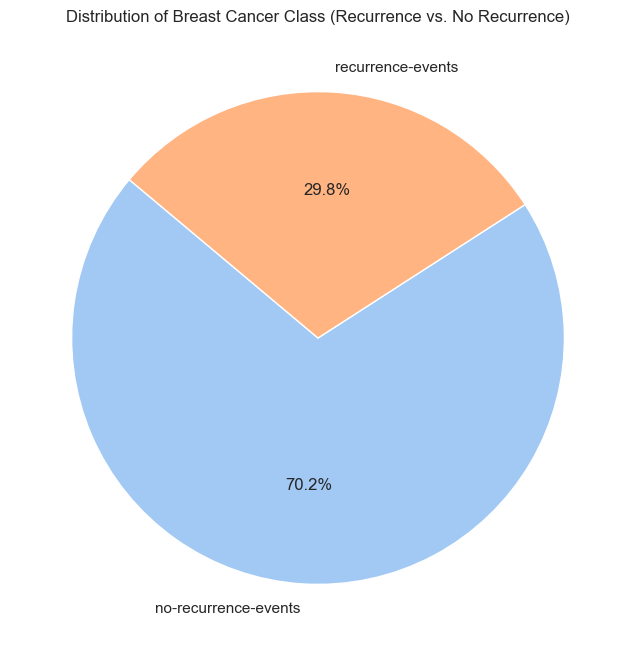

C:\Users\orili\AppData\Local\Temp\ipykernel_17280\284006972.py:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\orili\AppData\Local\Temp\ipykernel_17280\284006972.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




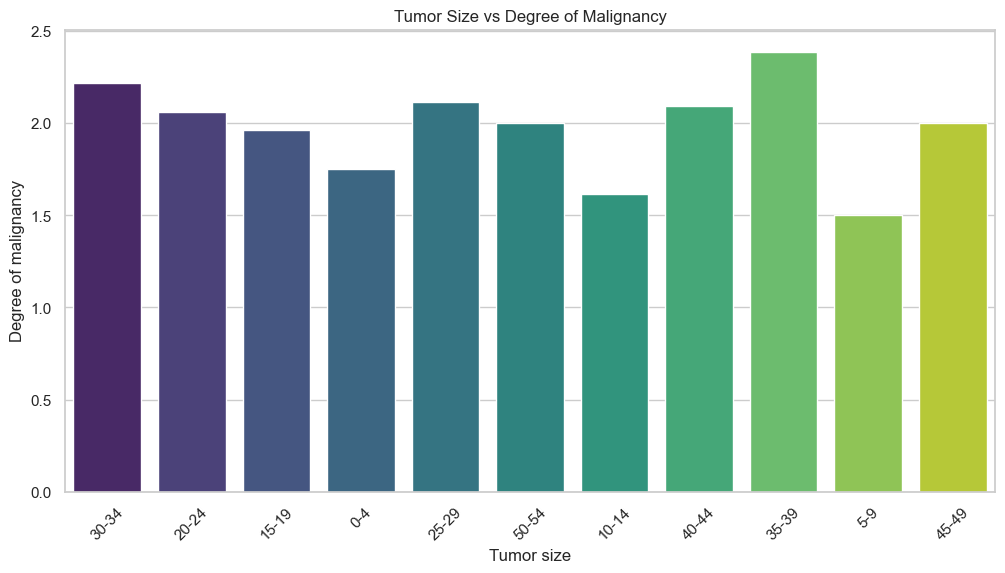

In [66]:
# This code was done by 222129816 - TANAKA MUSHUKUTU
# Pie Chart: Distribution of the target variable `Class`
class_distribution = breast_cancer_cleaned['Class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of Breast Cancer Class (Recurrence vs. No Recurrence)")
plt.show()

# Bar Graph: Tumor size vs. Degree of malignancy
plt.figure(figsize=(12, 6))
sns.barplot(x='Tumor size', y='Degree of malignancy', data=breast_cancer_cleaned, palette="viridis", ci=None)
plt.title("Tumor Size vs Degree of Malignancy")
plt.xticks(rotation=45)
plt.show()

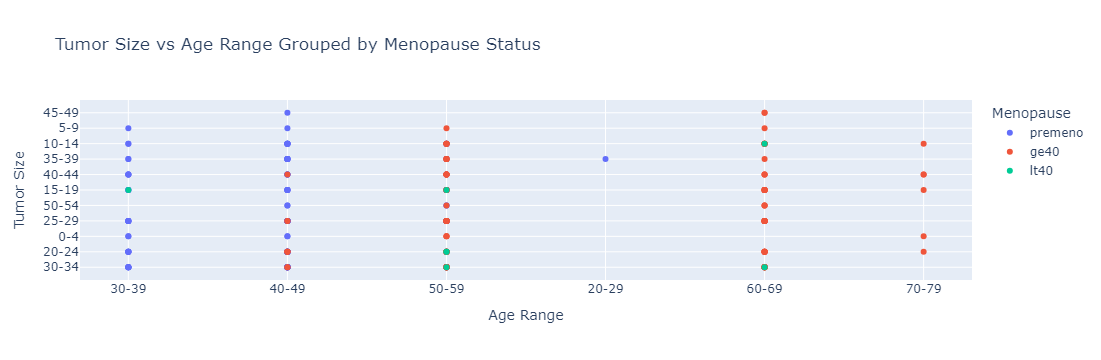

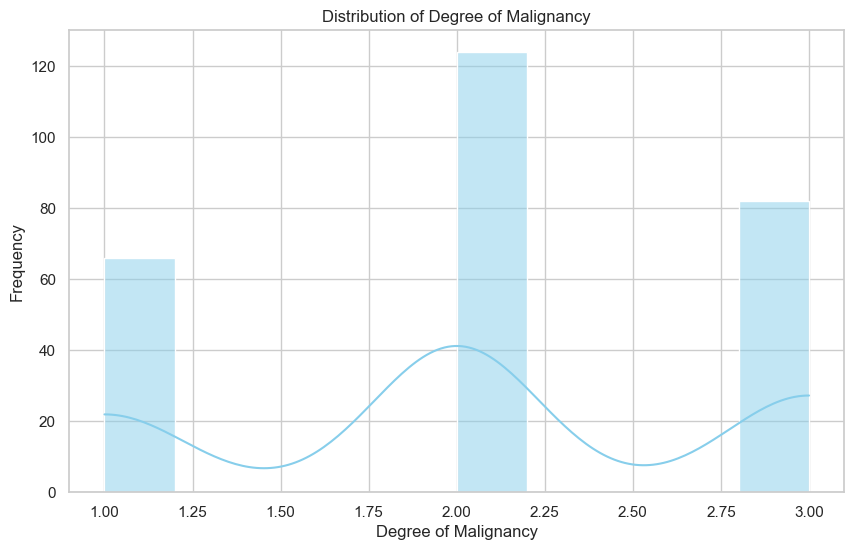

In [67]:
# Interactive Visualization: Tumor size vs Age Range grouped by Menopause status
fig = px.scatter(breast_cancer_cleaned, x='Age Range', y='Tumor size', color='Menopause', 
                 hover_data=['Degree of malignancy', 'Breast', 'Irradiat'],
                 title="Tumor Size vs Age Range Grouped by Menopause Status",
                 labels={'Age Range': 'Age Range', 'Tumor size': 'Tumor Size'})
fig.show()

# Normal Distribution: Visualizing `Degree of malignancy`
plt.figure(figsize=(10, 6))
sns.histplot(breast_cancer_cleaned['Degree of malignancy'], kde=True, color='skyblue', bins=10)
plt.title('Distribution of Degree of Malignancy')
plt.xlabel('Degree of Malignancy')
plt.ylabel('Frequency')
plt.show()

C:\Users\orili\AppData\Local\Temp\ipykernel_17280\787506072.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




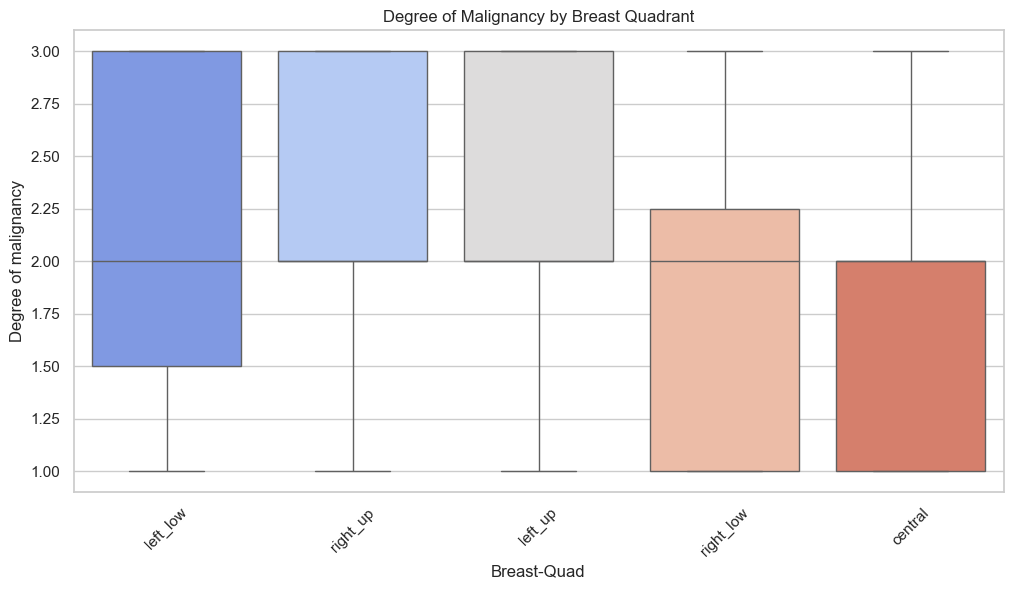

In [68]:
# This code was done by 222129816 - TANAKA MUSHUKUTU
# Box plot: Comparing Degree of malignancy for different Breast Quadrants
plt.figure(figsize=(12, 6))
sns.boxplot(x='Breast-Quad', y='Degree of malignancy', data=breast_cancer_cleaned, palette='coolwarm')
plt.title('Degree of Malignancy by Breast Quadrant')
plt.xticks(rotation=45)
plt.show()

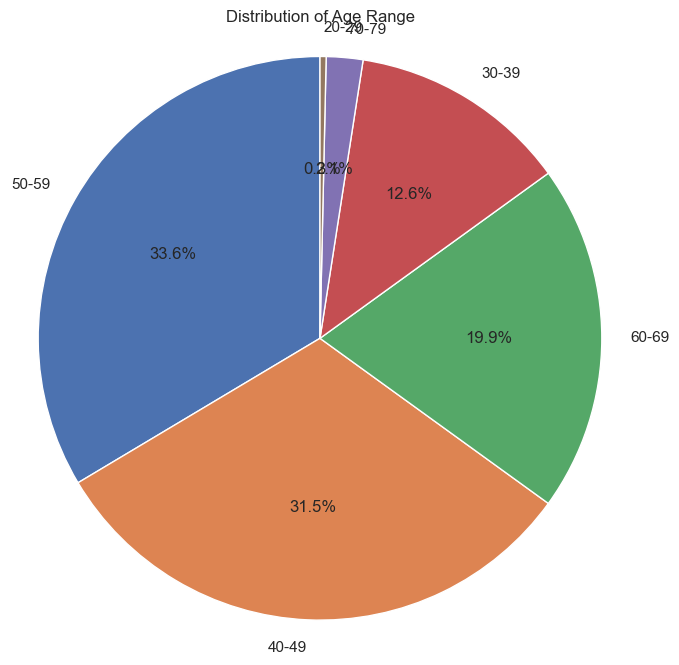

In [69]:
# This code was done by 223002291 - Beaven Muyoba
# Count the occurrences of each unique value in the 'Age Range' column
age_range_counts = breast_cancer['Age Range'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_range_counts, labels=age_range_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Range')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

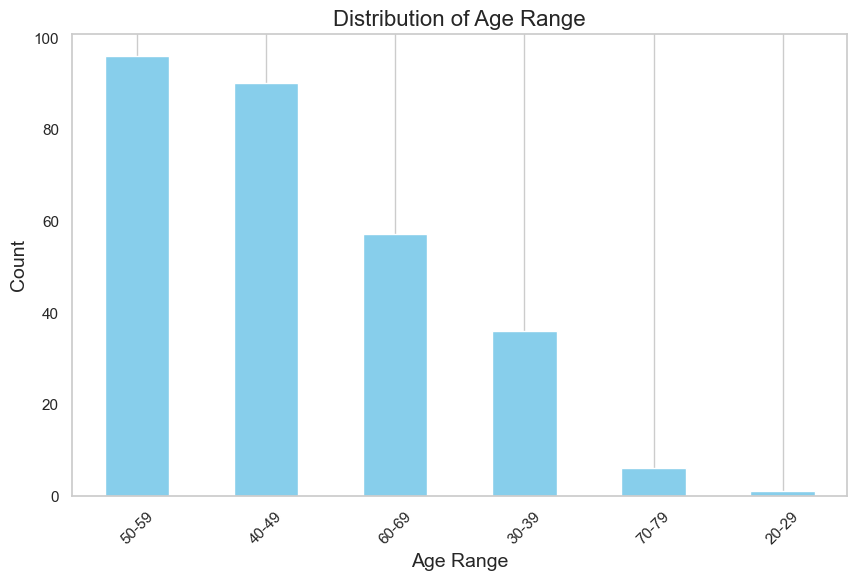

In [70]:
# This code was done by 223002291 - Beaven Muyoba
age_range_counts = breast_cancer['Age Range'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
age_range_counts.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Distribution of Age Range', fontsize=16)
plt.xlabel('Age Range', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the bar graph
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Optional: add grid lines for better readability
plt.show()

# **Machine Learning**

In [ ]:
# This code was done by 223077593 - ORILIO NAOBEB